In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 全体のデータの分布の確認と異常値の対応

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# 異常値前処理
df = df[(df[['x','y','z']] != 0).all(axis=1)]
len(df)

53920

### caratとpriceの散布図

Text(0, 0.5, 'price')

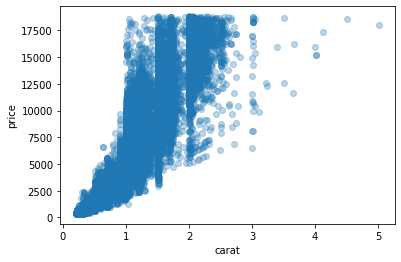

In [ ]:
carat = df['carat']
price = df['price']

plt.scatter(carat, price, alpha=0.3)
plt.xlabel('carat')
plt.ylabel('price')

## 正規方程式実装

In [ ]:
# vstack：配列を縦に結合
# T：転置
X = np.vstack([np.ones(len(carat)), carat]).T
X

array([[1.  , 0.23],
       [1.  , 0.21],
       [1.  , 0.23],
       ...,
       [1.  , 0.7 ],
       [1.  , 0.86],
       [1.  , 0.75]])

In [ ]:
# np.linalg.inv：逆行列
# dot：行列積算
y = price
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
# 正規方程式解
theta_best

array([-2255.76878704,  7755.76725406])

Text(0, 0.5, 'price')

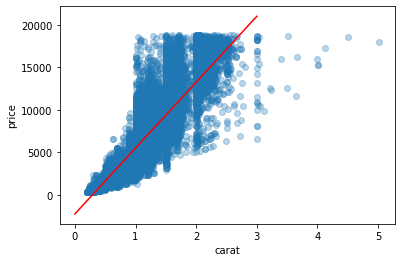

In [ ]:
x_axis = np.linspace(0,3,10)
y_pred = theta_best[0] + theta_best[1] * x_axis

plt.scatter(carat, price, alpha=0.3)
plt.plot(x_axis, y_pred, 'red')
plt.xlabel('carat')
plt.ylabel('price')

In [1]:
print('test')

test
